In [21]:
# ---------- Moving average of the scores of the agent with N0=0.001, N0=2.5 and N0=5 ----------

import statistics
import sys

import src.serializer as serializer
import src.aux_plots as aux_plots

        
exp_adam = serializer.Experiment.load_experiment('./serialized_models/adam_2020_12_27_15_27_35.dill')
exp_adam_n25 = serializer.Experiment.load_experiment('./serialized_models/adam_n25_2020_12_27_15_18_08.dill')
exp_lfa_n00 = serializer.Experiment.load_experiment('./serialized_models/sarsa_lfa_n00_2020_12_27_15_09_33.dill')
exp_lfa_n25 = serializer.Experiment.load_experiment('./serialized_models/sarsa_lfa_n25_2020_12_27_14_19_24.dill')
exp_adam_n25_r1 = serializer.Experiment.load_experiment('./serialized_models/adam_r1_2020_12_27_15_13_52.dill')
num_eps = 2500
blocks = num_eps//100


## Sarsa With Linear Function Approximation

In this experiment we tested a linear function approximation with Sarsa. So for the values of Q(state, action) we substitute for a Q(w, state, action) where w are the weights for the following linear function:

w1*f1 + w2*f2 +... +wn*fn + wn+1

And the weights are updated as follows:
delta = reward + gamma * Q(w, new_state, new_action) - Q(w, old_state, old_action)
Weights += alpha * delta * (Features)



### Score Sarsa LFA

In this first experiment, for the features we chose the y position of the chicken, if has collided and the x positions for the cars. The actions space is to go forward or be still. We chose Gamma=0.99, N0=2.5, alpha=0.001 and the rewords we chose were R3.




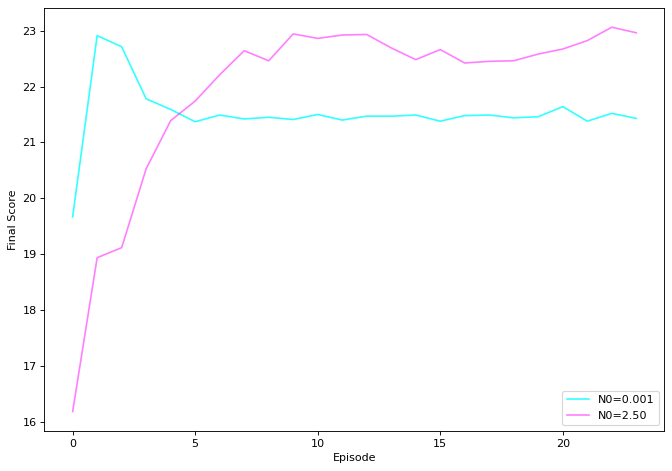

In [2]:
s1 = exp_lfa_n00.scores[:num_eps]
s2 = exp_lfa_n25.scores[:num_eps]
s1_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s1[b*100:(b+1)*100])
    s1_avg100.append(value)

s2_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s2[b*100:(b+1)*100])
    s2_avg100.append(value)
    
aux_plots.plot_2scores(s1_avg100, s2_avg100, "N0=0.001", "N0=2.50")

After running the experiment with 2500 we already can see the convergence for the model. Analyzing the results based on the mean for the 100 last scores in each run, we can see that it passes the baseline, but not by much, the chicken learns a similar strategy as the baseline that is to go forward and not to worry about the collisions. We can observe that the linear model is too simple and it underfits the problem.


In this second experiment we changed N0 to 0.001, and gave 2500 iterations. We can see that at first it rises very fast to the peak mean score of about 23, but as the weights keep being influenced to go forward we see that the weights explode to go only forward, going back to a mean score of 21.


### Scores Sarsa LSA with and without optimizer


In this third experiment we used an optimization algorithm to change alpha over time and used a similar strategy as the l2 regularization. The Adam optimization algorithm is an algorithm that update alpha as the experiment runs, so in each iteration we update alpha as follows:
self.m = self.beta_1 * self.m + (1 - self.beta_1) * g
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * np.power(g, 2)
        m_hat = self.m / (1 - np.power(self.beta_1, t))
        v_hat = self.v / (1 - np.power(self.beta_2, t))
        return self.alpha * m_hat / (np.sqrt(v_hat) + self.epsilon)
Where m and v are first and second moment estimators.

Inspired by the l2 regularization we also tried to subtract lambda*Weights in the weights update, where lambda is a hyperparameter.



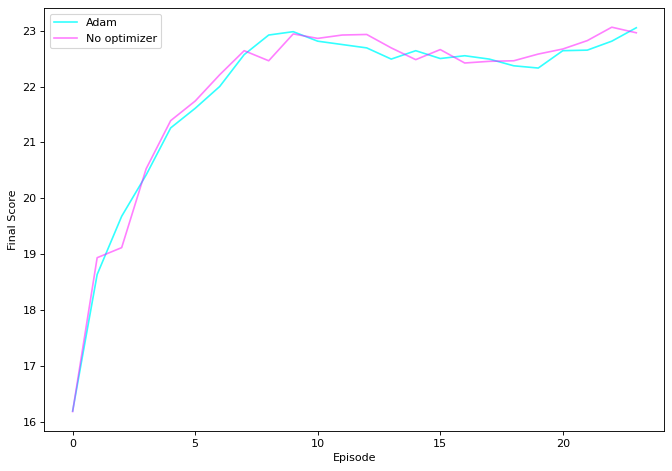

In [3]:
s1 = exp_adam_n25.scores[:num_eps]
s2 = exp_lfa_n25.scores[:num_eps]
s1_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s1[b*100:(b+1)*100])
    s1_avg100.append(value)

s2_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s2[b*100:(b+1)*100])
    s2_avg100.append(value)
    
aux_plots.plot_2scores(s1_avg100, s2_avg100, "Adam", "No optimizer")


In this experiment we ran many values for alpha, beta_1, beta_2 and lambda, and we concluded that Adam can speed up the convergence, but for these two ideas we coulnt see  an improvement of the solution. We ran 2500 iterations with alpha=0.001, beta1=0.9 and beta_2=0.99 and lambda=0.001, and N0 = 0.01, and we see the same conclusion as the previous experiment.

### Score Adam N0=0.01" vs "N0=2.50

We changed N0=2.5 and we compare if Adam works better with N0=0.01

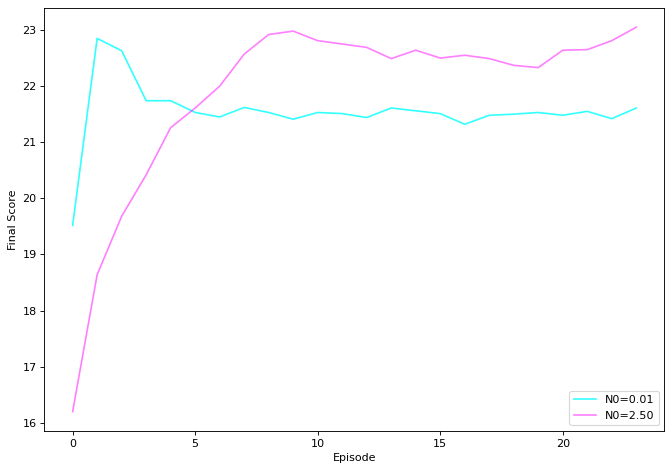

In [4]:

s1 = exp_adam.scores[:num_eps]
s2 = exp_adam_n25.scores[:num_eps]
s1_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s1[b*100:(b+1)*100])
    s1_avg100.append(value)

s2_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s2[b*100:(b+1)*100])
    s2_avg100.append(value)
    
aux_plots.plot_2scores(s1_avg100, s2_avg100, "N0=0.01", "N0=2.50")

### Reward Adam N0=0.01" vs "N0=2.50

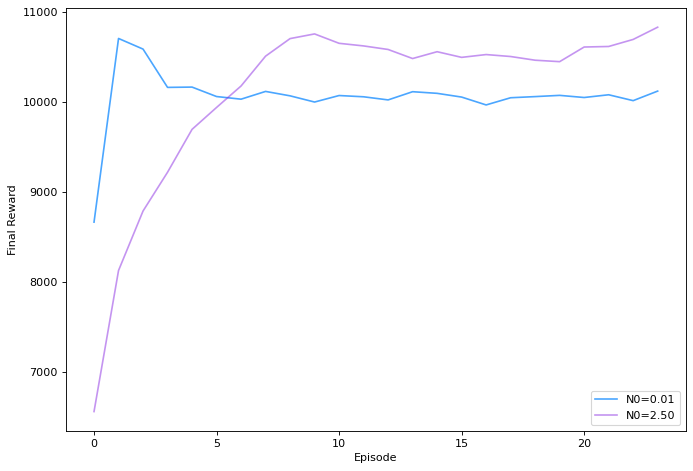

In [5]:

s1 = exp_adam.total_rewards[:num_eps]
s2 = exp_adam_n25.total_rewards[:num_eps]
s1_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s1[b*100:(b+1)*100])
    s1_avg100.append(value)

s2_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s2[b*100:(b+1)*100])
    s2_avg100.append(value)
    
    
aux_plots.plot_2rewards(s1_avg100, s2_avg100, "N0=0.01", "N0=2.50")

Unfortunately we see again results similar to the first experiment.


### Score Adam Reward=r1", "Reward=r3

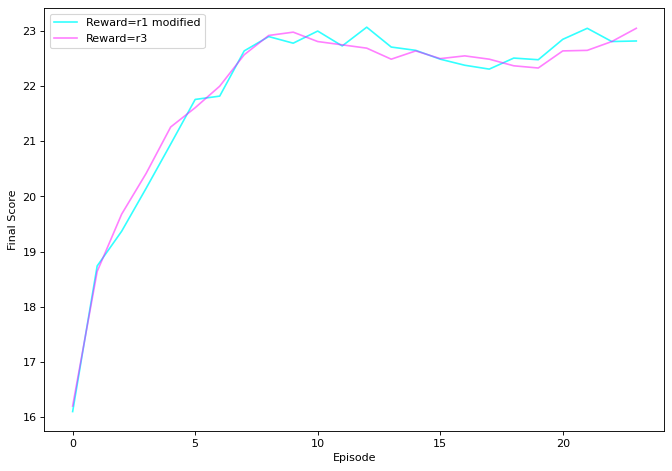

In [25]:


s1 = exp_adam_n25_r1.scores[:num_eps]
s2 = exp_adam_n25.scores[:num_eps]
s1_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s1[b*100:(b+1)*100])
    s1_avg100.append(value)


s2_avg100 = []
for b in range(blocks-1):
    value = statistics.mean(s2[b*100:(b+1)*100])
    s2_avg100.append(value)
    
aux_plots.plot_2scores(s1_avg100, s2_avg100, "Reward=r1 modified", "Reward=r3")

We changed the rewards to r1, in hopes that it could learn to avoid collisions, but it kept falling to very low scores since it was too scared and it was still most of the time. Changing only the reward when a collision happened to -0.5, then it got better but it just got as good as the other ones.


## Conclusion

This game requires a more complex model to make an approximation. The linear approximation for Sarsa underfits, maybe with a better approximator it could work better. Most models are influenced to learn to go forward, and cannot serve well to evaluate the state for this game. This is due to the nature of the features and the fact that there is not many of them. Many other types of features were tested, as the distance to the cars, reorganizing to get the distance to the next car and others, still the pure ram worked as good as the others. Another problem is that Sarsa can sometimes lose knowledge since it is not a perfect gradient descent, as we saw in the experiments.

An advantage seen was that compared to Sarsa Lambda, this performs

In [7]:
from matplotlib import animation
# From https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553
def _save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)

In [8]:
def generate_gif(fn: str, agent):
    env, initial_state = environment.get_env()
    game_over = False
    state = reduce_state(initial_state)[RAM_mask].data.tobytes()  # Select useful bytes
    action = agent.act(state)

    frames = []
    FRAME_FREQ = 2

    for t in range(1000):
        if t % FRAME_FREQ == 0:
            frames.append(env.render(mode="rgb_array"))

        ob, _, game_over, _ = env.step(action)

        ob = reduce_state(ob)
        state = ob[RAM_mask].data.tobytes()
        action = agent.act(state)  # Next action

        if game_over:
            break

    _save_frames_as_gif(frames=frames, path='./gif/', filename=f'{fn}.gif')

In [16]:

import src.environment as environment

import matplotlib.pyplot as plt
def reduce_state(ob):
    # Doesn't matter where we were hit
    ob[16] = 1 if ob[16] != 255 else 0

    # Reduce chicken y-position
    ob[14] = ob[14] // 3

    for b in range(108, 118):
        # The chicken is in the x-posistion ~49
        if ob[b] < 20 or ob[b] > 80:
            # We don't need to represent cars far from the chicken
            ob[b] = 0
        else:
            # Reduce the cars x-positions sample space
            ob[b] = ob[b] // 3

    return ob

RAM_mask = [
      14  # Chicken Y
    , 16  # Chicken Lane Collide
    , 108, 109, 110, 111, 112, 113, 114, 115, 116, 117  # Car X Coords
]

CPU times: user 4.13 s, sys: 45.6 ms, total: 4.17 s
Wall time: 34 s


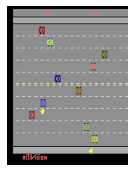

In [18]:
%%time
generate_gif('sarsa_lfa_n00', exp_lfa_n00.agent)

CPU times: user 4.13 s, sys: 40.5 ms, total: 4.18 s
Wall time: 34.1 s


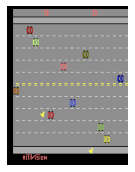

In [19]:
%%time
generate_gif('exp_lfa_n25', exp_lfa_n00.agent)

CPU times: user 4.2 s, sys: 57.6 ms, total: 4.25 s
Wall time: 33.9 s


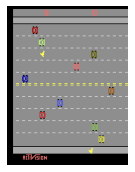

In [20]:
%%time
generate_gif('exp_adam_n25_r1', exp_lfa_n00.agent)